### 1) Preprocessing

In [1]:
import os
import shutil
import shap
import numpy as np
import tensorflow as tf
from keras.utils import image_dataset_from_directory, load_img
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import  Input, Activation, Flatten, Conv2D, MaxPooling2D,  Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy

 1.1) Loading an image dataset from the 'flowers' directory using the image_dataset_from_directory function. It resizes the images to 128x128 pixels and groups them into batches of 32 images each for easier processing.

In [3]:
data = image_dataset_from_directory(
    'flowers',
    image_size=(128, 128),
    batch_size=32 
)

Found 1517 files belonging to 2 classes.


1.2) Labeling the images into arrays and appends them to the respective listsand normalizing the data, and since the pixel values of the images are normalized by dividing by 255.0, scaling the values to the range [0, 1].

In [5]:
images, labels = [], []
for image, label in data:
    images.append(image.numpy())
    labels.append(label.numpy())
images, labels = np.concatenate(images), np.concatenate(labels)
images /= 255.0

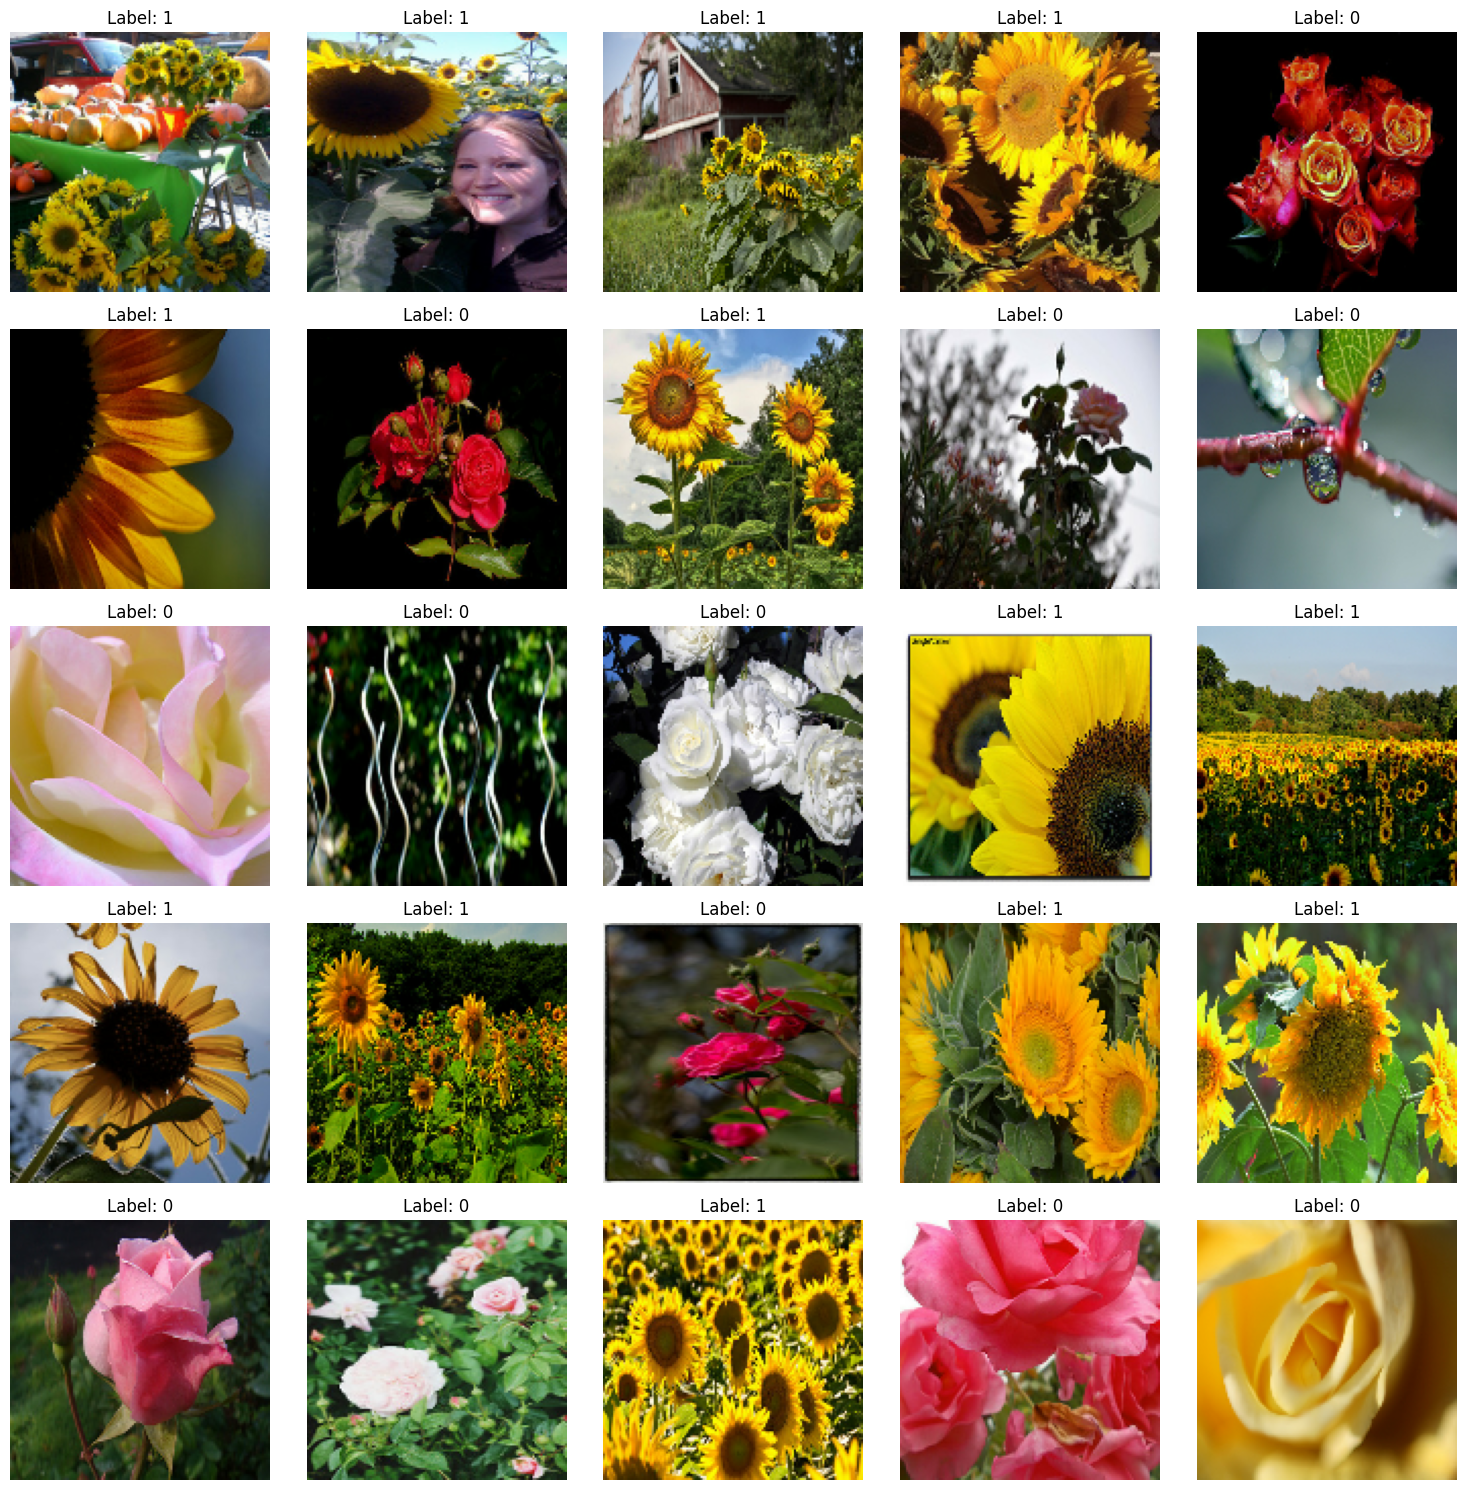

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

for i in range(25):
    axes[i].imshow(images[i])
    axes[i].axis('off') 
    axes[i].set_title(f"Label: {labels[i]}")

plt.tight_layout()

### 2) Buidling the model

2.1) Concatenating image and label arrays into training and testing sets using the train_test_split function. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, shuffle=True, random_state=11, stratify=labels)

2.2) Training a convolutional neural network (CNN) for image classification.

**Model Architecture:**
- <u>Input Layer</u>: The model takes input images of shape (128, 128, 3), where 3 represents the RGB color channels.
- <u>Convolutional Layers:</u>
Conv2D layers apply convolution operations, using 32 filters in the first layer and 16 in the second, with a kernel size of 3x3 and ReLU activation.
MaxPooling2D layers downsample the feature maps by a factor of 2.
- <u>Flatten Layer:</u> The output from the convolutional layers is flattened into a 1D vector.
- Dense Layer: A fully connected layer with 3 output units (for 3 classes).
- <u>Softmax Activation:</u>The output layer uses softmax to produce class probabilities.

The model is compiled with the Adam optimizer, and converts the labels to one-hot encoded format for multi-class classification.

The training process uses a batch size of 32, runs for 10 epochs, and uses 15% of the training data for validation.

In [8]:
inputs = Input(shape=(128, 128, 3), name="Input")
x = Conv2D(32, 3, activation="relu", padding='same', name='Conv1')(inputs)
x = MaxPooling2D(2, name='Pool1')(x)
x = Conv2D(16, 3, activation="relu", padding='same', name='Conv2')(x)
x = MaxPooling2D(2, name='Pool2')(x)
x = Flatten(name='Vectorize')(x)
x = Dense(3, name='FC')(x)
outputs = Activation("softmax", name='Softmax')(x)
model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['acc'])
model.summary()

hist = model.fit(
    X_train,
    to_categorical(y_train, 3),
    batch_size=32,
    epochs=10,
    validation_split=0.15,
    shuffle='on'
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Vectorize (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC (Dense)                      │ (None, 3)              │        49,155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Activation)            │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,675 (213.57 KB)

 Trainable params: 54,675 (213.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - acc: 0.6557 - loss: 0.6439 - val_acc: 0.7778 - val_loss: 0.5176
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.8596 - loss: 0.3705 - val_acc: 0.9064 - val_loss: 0.2609
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - acc: 0.8955 - loss: 0.2473 - val_acc: 0.8713 - val_loss: 0.3039
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - acc: 0.9259 - loss: 0.1942 - val_acc: 0.8889 - val_loss: 0.2414
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.9090 - loss: 0.2130 - val_acc: 0.9064 - val_loss: 0.2441
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.9423 - loss: 0.1504 - val_acc: 0.8830 - val_loss: 0.3267
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - acc: 0.9447 - loss: 0.1679 - val_acc: 0.8947 - val_loss: 0.2818
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - acc: 0.9445 - loss: 0.1468 - val_acc: 0.9006 - val_loss: 0.2442
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - acc: 0.9639

2.3) Evaluating the performance of the trained CNN model on the test

In [9]:
y_hat=model.predict(X_test)
print('Acc=',np.sum(y_hat.argmax(1)==y_test)/y_test.shape[0])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Acc= 0.9131578947368421


### 3) Shap

3.1)  SHAP (SHapley Additive exPlanations) to explain the model's predictions for a specific test image from the dataset. 

- Taking an input x, makes a copy of it, and passes it to the trained model to get predictions.
- Creating a SHAP masker that will generate blurred versions of the input images.

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:17, 17.45s/it]               


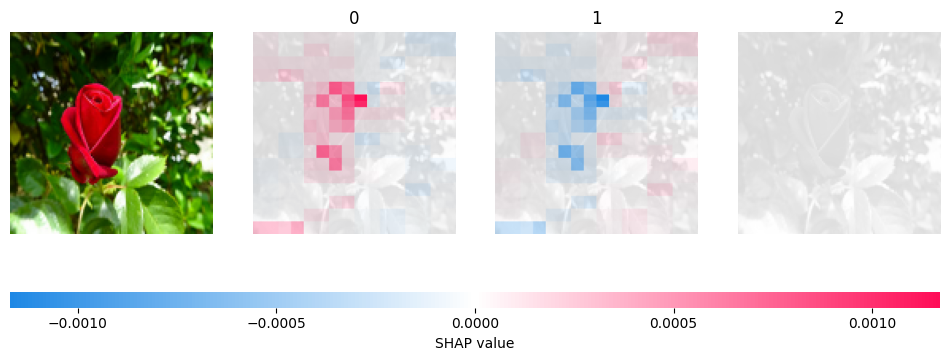

In [10]:
def f(x):
    tmp = x.copy()
    return model(tmp)
masker_blur = shap.maskers.Image("blur(128,128)", X_test[0].shape)
explainer = shap.Explainer(f, masker_blur, output_names=list(range(3)))
ind=[311]
shap_values_ = explainer( X_test[ind], max_evals=5000, batch_size=50 )     
shap.image_plot(shap_values_,labels=[0,1,2])

### 4) ProPnet

**Step 1: Feature Extractor (CNN Backbone):**

- Function build_feature_extractor: This function creates a simple CNN model that acts as a feature extractor.

<u>Layers:</u>

- 64 filters with a 3x3 kernel and ReLU activation, followed by max pooling.
- 128 filters with a 3x3 kernel and ReLU activation, followed by max pooling.
- 256 filters with a 3x3 kernel and ReLU activation, followed by max pooling.

<u>Model Creation:</u> The model is defined using Keras' functional API.

**Step 2: Prototype Layer:**
Iitialization of the prototypes as learnable weights and computing the squared L2 distances between the feature maps and the prototypes to create a similarity score (negative distances).


**Step3: Build ProtoPNet:**
Use Feature extraction, the Prototype layers and finally the classifcation layer


**Step4: Model Compilation:**

The ProtoPNet model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as a metric.




In [11]:
input_shape = (128, 128, 3)
num_prototypes = 10  
num_classes = 3     

def build_feature_extractor(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    feature_extractor = models.Model(inputs, x)
    return feature_extractor

class PrototypeLayer(tf.keras.layers.Layer):
    def __init__(self, num_prototypes, prototype_shape):
        super(PrototypeLayer, self).__init__()
        self.prototypes = self.add_weight(shape=(num_prototypes, *prototype_shape), 
                                          initializer='random_normal', trainable=True)

    def call(self, feature_maps):
        feature_maps_exp = tf.expand_dims(feature_maps, axis=1)
        distances = tf.reduce_sum((feature_maps_exp - self.prototypes) ** 2, axis=[-3, -2, -1])
        return -distances 

def build_protoPNet(input_shape, num_prototypes, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    
    feature_extractor = build_feature_extractor(input_shape)
    feature_maps = feature_extractor(inputs)
    
    prototype_shape = feature_maps.shape[1:]
    prototype_layer = PrototypeLayer(num_prototypes, prototype_shape)
    prototype_distances = prototype_layer(feature_maps)
    
    logits = layers.Dense(num_classes, activation=None)(prototype_distances)
    outputs = layers.Activation('softmax')(logits)

    model = models.Model(inputs, outputs)
    return model

protoPNet = build_protoPNet(input_shape, num_prototypes, num_classes)
protoPNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', metrics=['accuracy'])

protoPNet.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ (None, 16, 16, 256)    │       370,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prototype_layer                 │ (None, 10)             │       655,360 │
│ (PrototypeLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,026,209 (3.91 MB)

 Trainable params: 1,026,209 (3.91 MB)

 Non-trainable params: 0 (0.00 B)

**Step5: One-Hot Encoding of Labeling:**

Converts the training labels (y_train) into one-hot encoded format for multi-class classification. 

**Step6: Model Training**

**Step4: Model Compilation**

In [12]:
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

protoPNet.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.15)

test_loss, test_acc = protoPNet.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc}")


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 664ms/step - accuracy: 0.4169 - loss: 137.5175 - val_accuracy: 0.5556 - val_loss: 13.2423
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 602ms/step - accuracy: 0.5597 - loss: 5.9724 - val_accuracy: 0.8538 - val_loss: 0.4338
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 617ms/step - accuracy: 0.7817 - loss: 0.4616 - val_accuracy: 0.9006 - val_loss: 0.3296
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 623ms/step - accuracy: 0.8374 - loss: 0.3970 - val_accuracy: 0.8538 - val_loss: 0.3589
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 621ms/step - accuracy: 0.8542 - loss: 0.3418 - val_accuracy: 0.8830 - val_loss: 0.2829
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 596ms/step - accuracy: 0.8788 - loss: 0.3044 - val_accuracy: 0.9240 - val_loss: 0.2543
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 579ms/step - accuracy: 0.8941 - loss: 0.2676 - val_accuracy: 0.9181 - val_loss: 0.2454
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 569ms/step - accuracy: 0.8916 - loss: 0.2637 - val_a

Visualization the prototypes learned by the ProtoPNet model alongside an example input image. By averaging the prototype over its color channels, the prototype can be represented in a format suitable for visualization, helping to understand what features the model has identified as important for classification

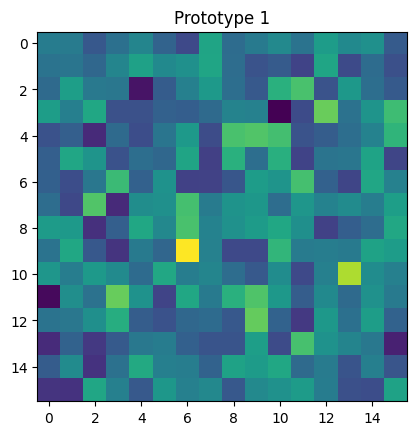

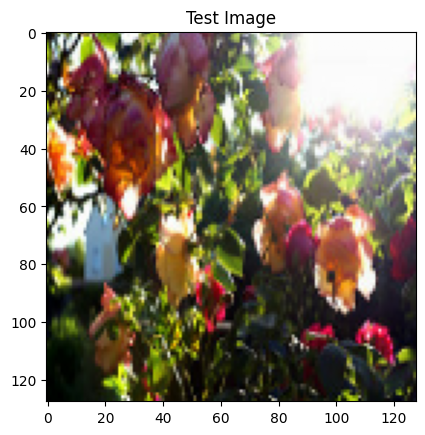

In [20]:
prototypes = protoPNet.layers[2].prototypes.numpy()
prototype_image = np.mean(prototypes[0], axis=-1)  

plt.imshow(prototype_image, cmap='viridis')
plt.title("Prototype 1")
plt.show()

example_image = X_test[0]
plt.imshow(example_image)
plt.title("Test Image")
plt.show()
